<a href="https://colab.research.google.com/github/AndresRestrepoRodriguez/computer_vision/blob/main/faster_rcnn_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
train = torchvision.datasets.VOCDetection('./data', download=True)
len(train)

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


5717

In [4]:
voc_classes = ["background",
            "aeroplane",
            "bicycle",
            "bird",
            "boat",
            "bottle",
            "bus",
            "car",
            "cat",
            "chair",
            "cow",
            "diningtable",
            "dog",
            "horse",
            "motorbike",
            "person",
            "pottedplant",
            "sheep",
            "sofa",
            "train",
            "tvmonitor"]

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import random

def get_sample(ix):
  img, label = train[ix]
  img_np = np.array(img)
  anns = label['annotation']['object']
  if type(anns) is not list:
    anns = [anns]
  labels = np.array([voc_classes.index(ann['name']) for ann in anns])
  bbs = [ann['bndbox'] for ann in anns]
  bbs = np.array([[int(bb['xmin']), int(bb['ymin']),int(bb['xmax'])-int(bb['xmin']),int(bb['ymax'])-int(bb['ymin'])] for bb in bbs])
  anns = (labels, bbs)
  return img_np, anns

def plot_anns(img, anns, ax=None, bg=-1, classes=voc_classes):
  # anns is a tuple with (labels, bbs)
  # bbs is an array of bounding boxes in format [x_min, y_min, width, height] 
  # labels is an array containing the label 
  if not ax:
    fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(img)
  labels, bbs = anns
  for lab, bb in zip(labels, bbs):
    if bg == -1 or lab != bg:
      #bb = bb.detach().numpy()
      x, y, w, h = bb
      #print(f"{type(bb)}")
      #print(f"{x}, {y}, {w}, {h}")
      rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
      text = ax.text(x, y - 10, classes[lab], {'color': 'red'})
      text.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
      ax.add_patch(rect)

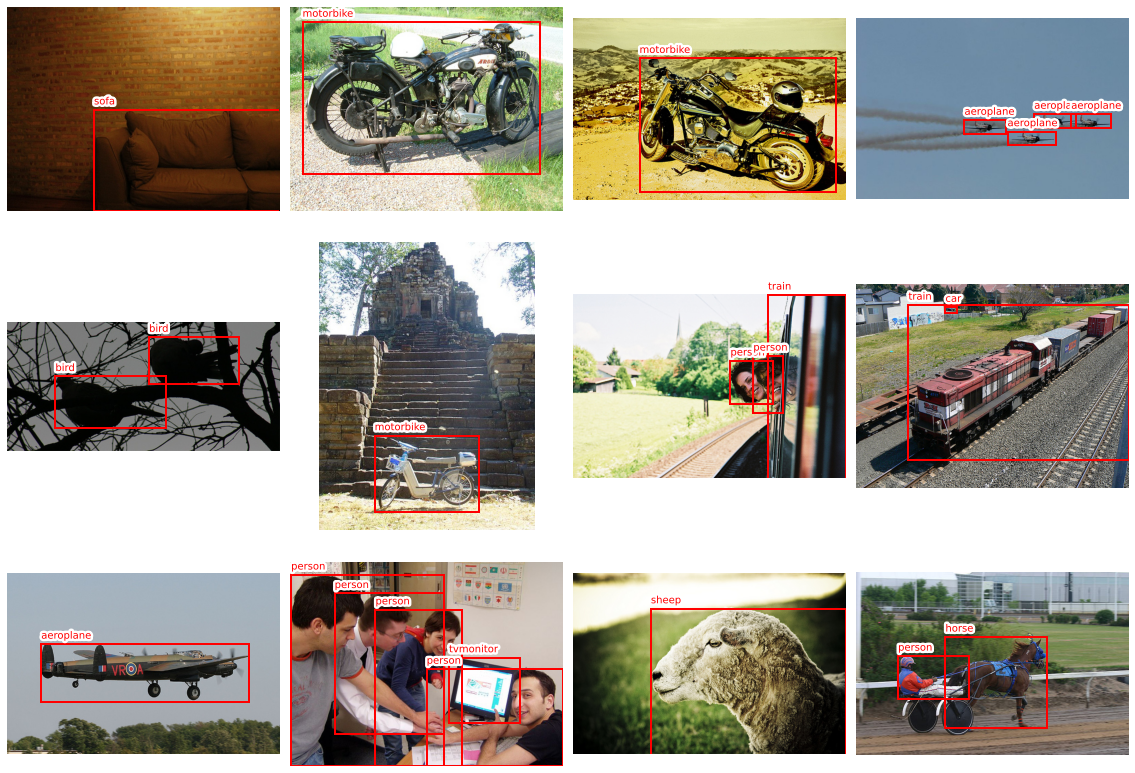

In [7]:
r, c = 3, 4
fig = plt.figure(figsize=(4*c, 4*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(train)-1)
        img_np, anns = get_sample(ix)
        plot_anns(img_np, anns, ax)
        plt.axis("off")
plt.tight_layout()
plt.show()

In [5]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

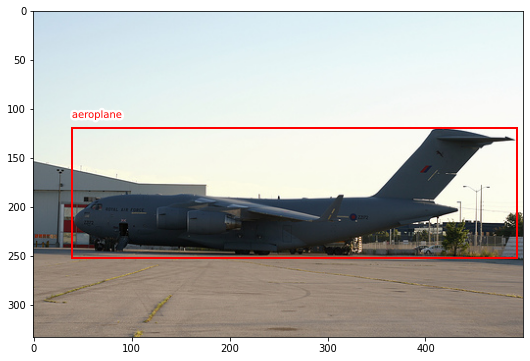

In [8]:
img_np, anns = get_sample(4445)
plot_anns(img_np, anns)
plt.show()

In [11]:
model.eval()
outputs = model([torch.tensor(img_np/255.).permute(2,0,1).float()])
outputs

[{'boxes': tensor([[ 37.4376, 123.0881, 465.7533, 244.7145],
          [395.2054, 239.3289, 417.7919, 248.7811],
          [ 83.6134, 212.1356,  97.7281, 245.2005],
          [389.6237, 239.5253, 405.0975, 248.0252],
          [ 40.6147, 171.6959, 375.7797, 246.6191],
          [394.6273, 241.2377, 407.7459, 248.6640],
          [297.5121, 236.5061, 326.4868, 249.9926],
          [297.9731, 236.9063, 325.1756, 250.0177],
          [230.6489, 119.3883, 486.6216, 229.6476],
          [ 87.7585, 211.9286,  96.6415, 232.8783],
          [273.1853, 239.2790, 299.6663, 248.0576],
          [390.4716, 239.0620, 402.1634, 245.3496],
          [ 76.5685, 229.0903,  82.8707, 246.0610],
          [  1.2251, 227.7767,  25.1209, 241.2924],
          [268.6220, 238.7137, 300.8833, 249.2730],
          [400.6866, 238.5920, 417.8362, 245.3861],
          [ 81.3748, 220.6622,  88.8553, 244.8086],
          [  1.2523, 231.9601,  17.4334, 241.2444]], grad_fn=<StackBackward0>),
  'labels': tensor([ 5,  3,

In [12]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

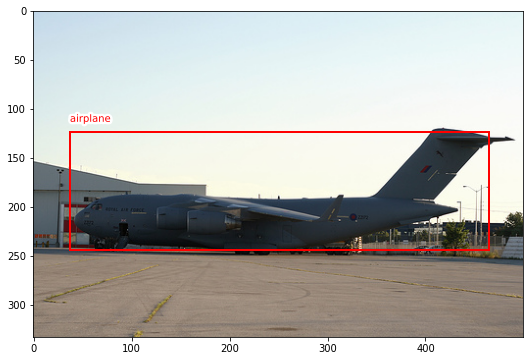

In [20]:
img_np, anns = get_sample(4445)
# nos quedamos con la primera detección
bb = outputs[0]['boxes'][0].long().tolist()
bb = [bb[0], bb[1], bb[2]-bb[0], bb[3]-bb[1]]
plot_anns(img_np, (outputs[0]['labels'][:1], [bb]), classes=COCO_INSTANCE_CATEGORY_NAMES)
plt.show()

In [16]:
def predict(img, threshold=0.8):
    model.eval()
    outputs = model([torch.tensor(img_np / 255.).permute(2,0,1).float()])
    # nos quedamos con la primera detección
    bb = outputs[0]['boxes'][0].long().tolist()
    bbs = [[bb[0], bb[1], bb[2]-bb[0], bb[3]-bb[1]] for o in outputs for bb, score in zip(o['boxes'], o['scores']) if score > threshold]
    labels = [lab for o in outputs for lab, score in zip(o['labels'], o['scores']) if score > threshold]
    return labels, bbs

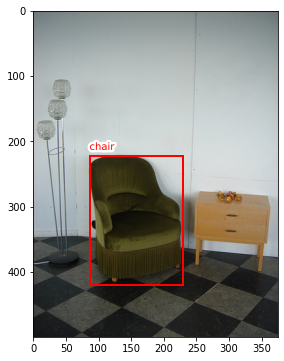

In [68]:
ix = random.randint(0, len(train)-1)
img_np, anns = get_sample(ix)
plot_anns(img_np, anns)
plt.show()

In [63]:
def anns_to_numpy(anns):
  for label_index in range(len(anns[0])):
    anns[0][label_index] = anns[0][label_index].detach().numpy()
  for bb_index in range(len(anns[1])):
    for val in range(len(anns[1][bb_index])):
      anns[1][bb_index][val] = anns[1][bb_index][val].detach().numpy()
  return anns

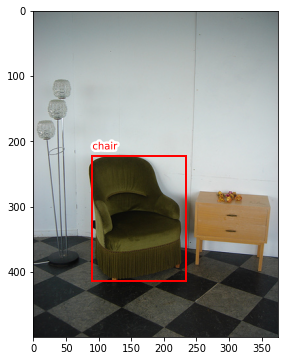

In [71]:
anns = predict(img_np)
anns = anns_to_numpy(anns)
plot_anns(img_np, anns, classes=COCO_INSTANCE_CATEGORY_NAMES)
plt.show()

In [70]:
anns

([tensor(62)],
 [[tensor(90.4319, grad_fn=<SelectBackward0>),
   tensor(222.2216, grad_fn=<SelectBackward0>),
   tensor(143.2441, grad_fn=<SubBackward0>),
   tensor(191.4822, grad_fn=<SubBackward0>)]])